## Assignment 04 - Marcos Hernandez
#### Assignment Instructions:
In this assignment, you will use the CIFAR-10 dataset to build a classifier that distinguishes between airplanes and birds. 
#### Your task includes the following:
* Train your model using both Adam and SGD optimizers.
* Experiment with three different learning rates for each optimizer.
* For each training scenario, you are required to:
* Plot the training accuracy and loss for every iteration (or epoch).
* Compare the performance across different optimizers and learning rates.

Using device: mps
Training with Adam optimizer and learning rate 0.001
Epoch 1, Loss: 0.4047173590372546
Epoch 2, Loss: 0.3144076338496071
Epoch 3, Loss: 0.2739590070308588
Epoch 4, Loss: 0.24468843612712793
Epoch 5, Loss: 0.21231616309846932
Epoch 6, Loss: 0.1817459445625258
Epoch 7, Loss: 0.15670767085204204
Epoch 8, Loss: 0.1256226023462729
Epoch 9, Loss: 0.09389716545313287
Epoch 10, Loss: 0.0715091431866022


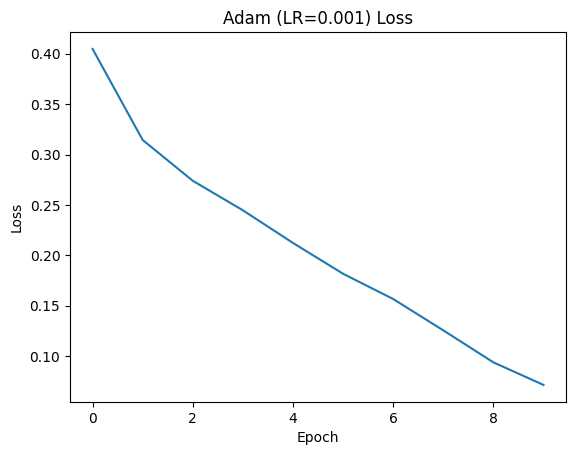

Training with Adam optimizer and learning rate 0.01
Epoch 1, Loss: 0.704917023357111
Epoch 2, Loss: 0.6936029281479101
Epoch 3, Loss: 0.6935571066487711
Epoch 4, Loss: 0.6934422858226033
Epoch 5, Loss: 0.6938474542035843
Epoch 6, Loss: 0.6936003908562584
Epoch 7, Loss: 0.6935250681048384
Epoch 8, Loss: 0.6935853394456565
Epoch 9, Loss: 0.6936865210914003
Epoch 10, Loss: 0.6937699915882879


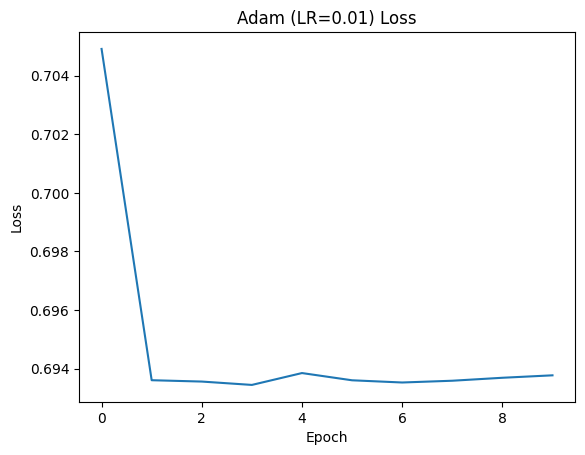

Training with Adam optimizer and learning rate 0.1
Epoch 1, Loss: 5.576915669745912
Epoch 2, Loss: 0.6991852752316874
Epoch 3, Loss: 0.6994192805914833
Epoch 4, Loss: 0.7001061913685296
Epoch 5, Loss: 0.6966769712420698
Epoch 6, Loss: 0.6969838568958612
Epoch 7, Loss: 0.6975217075012743
Epoch 8, Loss: 0.6967818457097672
Epoch 9, Loss: 0.6972876532009235
Epoch 10, Loss: 0.6957917148693682


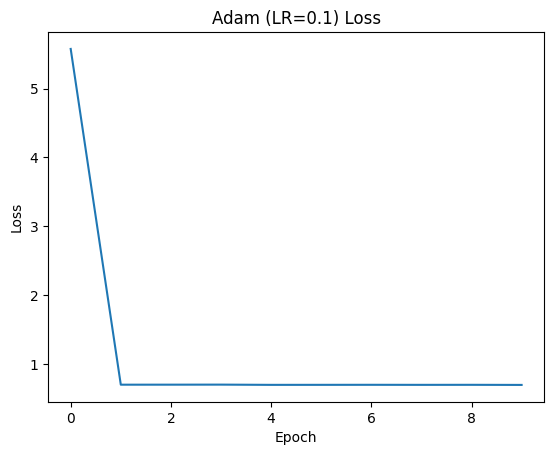

Training with SGD optimizer and learning rate 0.001
Epoch 1, Loss: 0.6861838391794565
Epoch 2, Loss: 0.67050248708207
Epoch 3, Loss: 0.6516757258972802
Epoch 4, Loss: 0.6279666585663256
Epoch 5, Loss: 0.6017411395002858
Epoch 6, Loss: 0.5769782113952758
Epoch 7, Loss: 0.5551289783689541
Epoch 8, Loss: 0.5349054883082454
Epoch 9, Loss: 0.517108084675603
Epoch 10, Loss: 0.5015625831799004


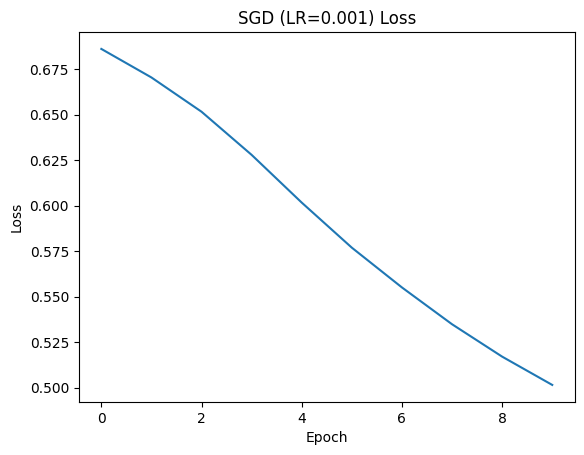

Training with SGD optimizer and learning rate 0.01
Epoch 1, Loss: 0.5829845037513648
Epoch 2, Loss: 0.46298443433194875
Epoch 3, Loss: 0.408559353111651
Epoch 4, Loss: 0.378486823445311
Epoch 5, Loss: 0.36179946462948104
Epoch 6, Loss: 0.35044335095455853
Epoch 7, Loss: 0.3388252677723242
Epoch 8, Loss: 0.33167995298251557
Epoch 9, Loss: 0.32510187217412284
Epoch 10, Loss: 0.31797820160659357


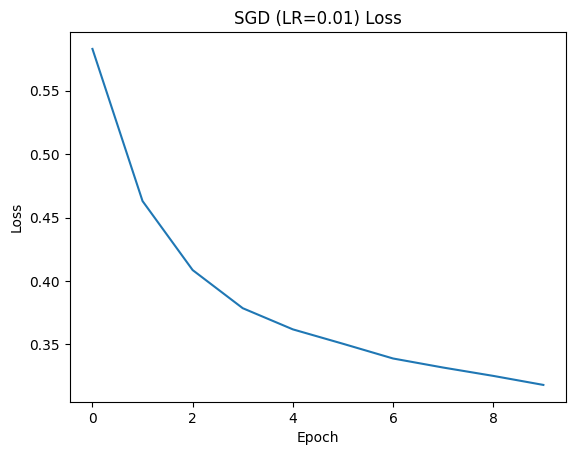

Training with SGD optimizer and learning rate 0.1
Epoch 1, Loss: 0.4556093181188876
Epoch 2, Loss: 0.34582815307397813
Epoch 3, Loss: 0.3123039858409772
Epoch 4, Loss: 0.2799706420959375
Epoch 5, Loss: 0.2540732308888969
Epoch 6, Loss: 0.22766897198967279
Epoch 7, Loss: 0.2031398848556101
Epoch 8, Loss: 0.18043498450908035
Epoch 9, Loss: 0.1547686673653202
Epoch 10, Loss: 0.13161485983778876


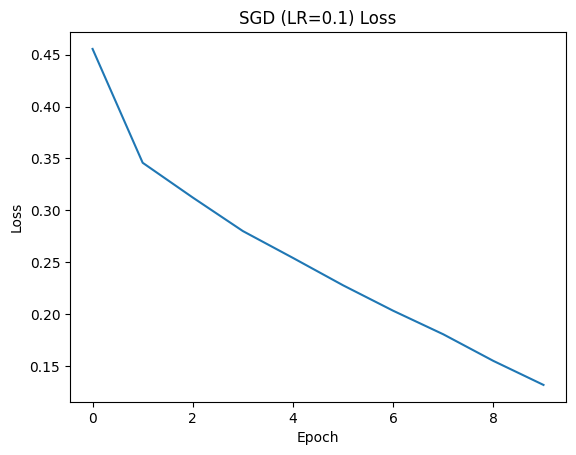

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Check if MPS (Metal Performance Shaders) is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Load and preprocess the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset for airplanes (label 0) and birds (label 2) and remap labels
def filter_classes(dataset, classes):
    filtered_data = []
    for data, label in dataset:
        if label in classes:
            new_label = 0 if label == 0 else 1  # Remap: 0 -> 0, 2 -> 1
            filtered_data.append((data, new_label))
    return filtered_data

filtered_trainset = filter_classes(trainset, [0, 2])
filtered_testset = filter_classes(testset, [0, 2])

# Update DataLoader
trainloader = torch.utils.data.DataLoader(filtered_trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(filtered_testset, batch_size=32, shuffle=False)

# 2. Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 2)  # Output 2 classes (airplane and bird)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Define the training function
def train_model(optimizer_name, learning_rate):
    model = SimpleCNN().to(device)  # Move model to GPU
    criterion = nn.CrossEntropyLoss()
    
    if optimizer_name == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    losses = []  # To store loss for each epoch

    for epoch in range(10):  # Example: 10 epochs
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}')
    
    return losses

# 4. Define the function to plot loss
def plot_loss(losses, title):
    if not losses:
        print("No losses to plot.")
        return
    plt.plot(losses)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# 5. Train the model with different optimizers and learning rates
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['Adam', 'SGD']

for optimizer in optimizers:
    for lr in learning_rates:
        print(f"Training with {optimizer} optimizer and learning rate {lr}")
        losses = train_model(optimizer_name=optimizer, learning_rate=lr)
        plot_loss(losses, title=f"{optimizer} (LR={lr}) Loss")

In [4]:
#Adam
#LRs:
#0.001
adam001 = [0.4047173590372546, 0.3144076338496071, 0.2739590070308588, 0.24468843612712793, 0.21231616309846932, 0.1817459445625258, 0.15670767085204204, 0.1256226023462729, 0.09389716545313287, 0.0715091431866022]
#0.01
adam01 = [0.704917023357111, 0.6936029281479101, 0.6935571066487711, 0.6934422858226033, 0.6938474542035843, 0.6936003908562584, 0.6935250681048384, 0.6935853394456565, 0.6936865210914003, 0.6937699915882879]
#0.1
adam1 = [5.576915669745912, 0.6991852752316874, 0.6994192805914833, 0.7001061913685296, 0.6966769712420698, 0.6969838568958612, 0.6975217075012743, 0.6967818457097672, 0.6972876532009235, 0.6957917148693682]

In [13]:
#SGD
#LRs:
# #0.001
sgd001 = [0.6861838391794565, 0.67050248708207, 0.6516757258972802, 0.6279666585663256, 0.6017411395002858, 0.5769782113952758, 0.5551289783689541, 0.5349054883082454, 0.517108084675603, 0.5015625831799004]
#0.01
sgd01 = [0.5829845037513648, 0.46298443433194875, 0.408559353111651, 0.378486823445311, 0.36179946462948104, 0.35044335095455853, 0.3388252677723242, 0.33167995298251557, 0.32510187217412284, 0.31797820160659357]
#0.1
sgd1 = [0.4556093181188876, 0.34582815307397813, 0.3123039858409772, 0.2799706420959375, 0.2540732308888969, 0.22766897198967279, 0.2031398848556101, 0.18043498450908035, 0.1547686673653202, 0.13161485983778876]


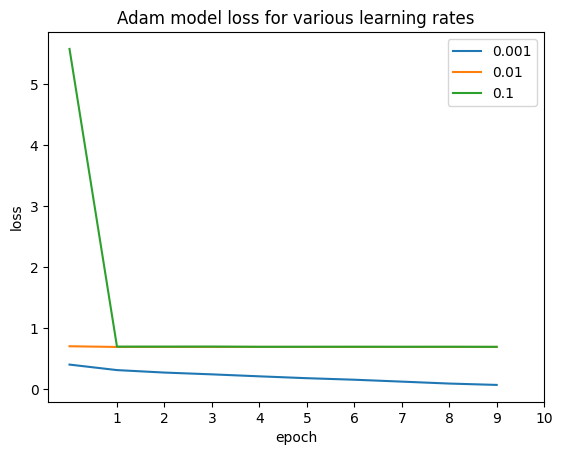

In [16]:
import matplotlib.pyplot as plt

plt.plot(adam001)
plt.plot(adam01)
plt.plot(adam1)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Adam model loss for various learning rates")
plt.legend(["0.001","0.01","0.1"])

plt.show()

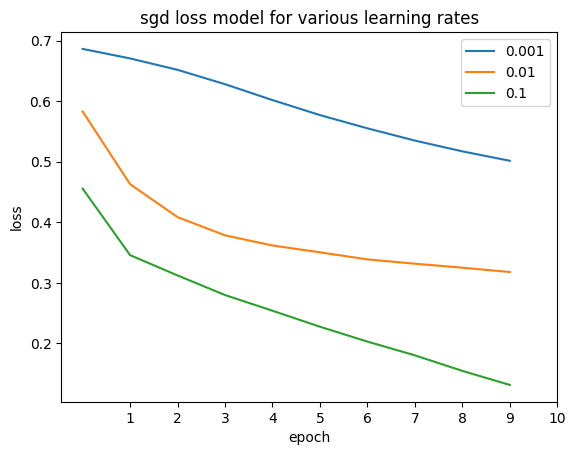

In [19]:
import matplotlib.pyplot as plt

plt.plot(sgd001)
plt.plot(sgd01)
plt.plot(sgd1)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("sgd loss model for various learning rates")
plt.legend(["0.001","0.01","0.1"])

plt.show()

Using device: mps
Training with Adam optimizer and learning rate 0.001
Epoch 1, Loss: 0.41042395816824306, Accuracy: 81.82%
Epoch 2, Loss: 0.3141396011645421, Accuracy: 86.88%
Epoch 3, Loss: 0.27653599409059215, Accuracy: 88.49%
Epoch 4, Loss: 0.2463349342917482, Accuracy: 89.69%
Epoch 5, Loss: 0.21914831764353349, Accuracy: 90.62%
Epoch 6, Loss: 0.1942556924856128, Accuracy: 92.18%
Epoch 7, Loss: 0.170667097341424, Accuracy: 92.85%
Epoch 8, Loss: 0.14345151693604816, Accuracy: 94.41%
Epoch 9, Loss: 0.11896659595707354, Accuracy: 95.42%
Epoch 10, Loss: 0.10165582161795456, Accuracy: 96.08%


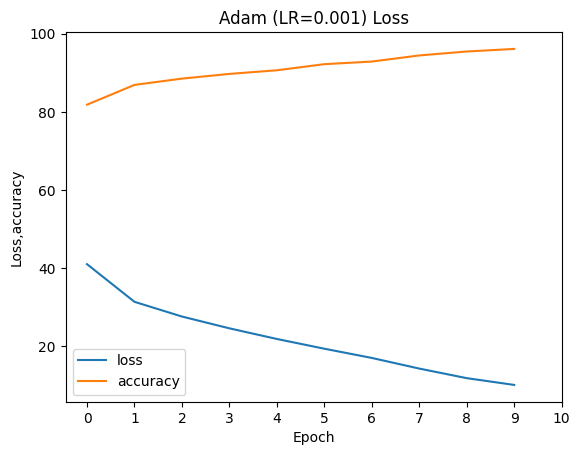

Training with Adam optimizer and learning rate 0.01
Epoch 1, Loss: 0.4704872998661888, Accuracy: 78.89%
Epoch 2, Loss: 0.4075974629709896, Accuracy: 82.49%
Epoch 3, Loss: 0.38477243278354123, Accuracy: 83.46%
Epoch 4, Loss: 0.36681573302410664, Accuracy: 84.55%
Epoch 5, Loss: 0.3447104998099537, Accuracy: 85.89%
Epoch 6, Loss: 0.33139727983516626, Accuracy: 86.42%
Epoch 7, Loss: 0.32528665107183946, Accuracy: 86.77%
Epoch 8, Loss: 0.3107227138913097, Accuracy: 87.27%
Epoch 9, Loss: 0.2962009513887544, Accuracy: 88.3%
Epoch 10, Loss: 0.284364650734126, Accuracy: 88.4%


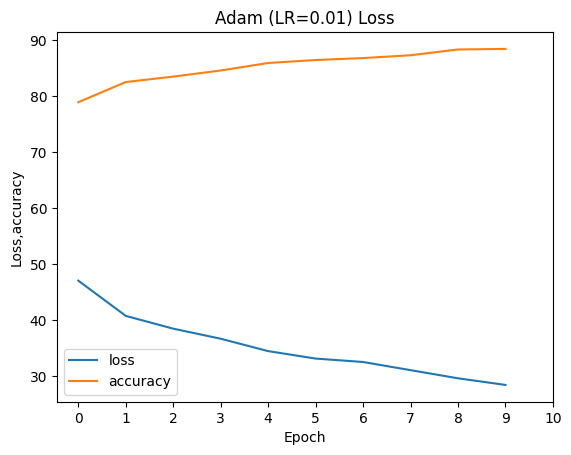

Training with Adam optimizer and learning rate 0.1
Epoch 1, Loss: 8.294925397196517, Accuracy: 49.88%
Epoch 2, Loss: 0.6977446313483265, Accuracy: 49.8%
Epoch 3, Loss: 0.6964764617883359, Accuracy: 49.97%
Epoch 4, Loss: 0.6958616273090862, Accuracy: 49.53%
Epoch 5, Loss: 0.6963012964961628, Accuracy: 50.06%
Epoch 6, Loss: 0.6978458958311965, Accuracy: 50.4%
Epoch 7, Loss: 0.6978883389086007, Accuracy: 49.12%
Epoch 8, Loss: 0.6959739694960962, Accuracy: 50.21%
Epoch 9, Loss: 0.7003743197209538, Accuracy: 49.95%
Epoch 10, Loss: 0.6975342768449753, Accuracy: 50.18%


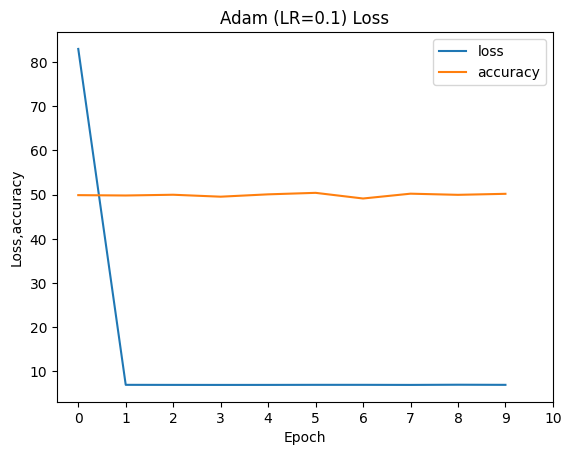

Training with SGD optimizer and learning rate 0.001
Epoch 1, Loss: 0.6884027401479288, Accuracy: 50.47%
Epoch 2, Loss: 0.6744650362398678, Accuracy: 61.22%
Epoch 3, Loss: 0.6556544107750962, Accuracy: 69.39%
Epoch 4, Loss: 0.6308196301277453, Accuracy: 71.66%
Epoch 5, Loss: 0.6024913721191235, Accuracy: 72.89%
Epoch 6, Loss: 0.5751302438422133, Accuracy: 73.56%
Epoch 7, Loss: 0.5522723594031775, Accuracy: 74.45%
Epoch 8, Loss: 0.5336195016250062, Accuracy: 75.35%
Epoch 9, Loss: 0.516758679391477, Accuracy: 76.38%
Epoch 10, Loss: 0.5037841444579176, Accuracy: 77.24%


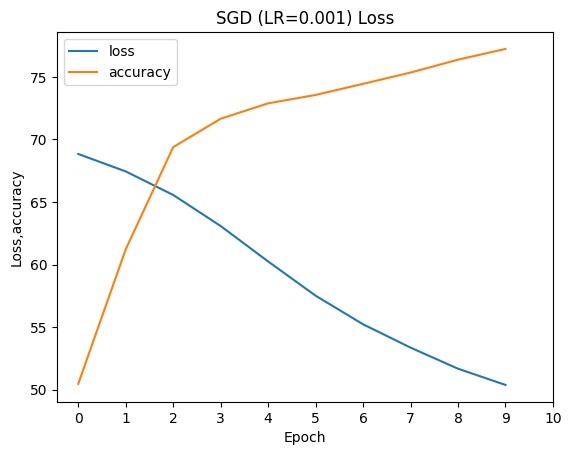

Training with SGD optimizer and learning rate 0.01
Epoch 1, Loss: 0.6212403063956922, Accuracy: 66.23%
Epoch 2, Loss: 0.4784250740235606, Accuracy: 79.45%
Epoch 3, Loss: 0.4093853436624661, Accuracy: 82.32%
Epoch 4, Loss: 0.37418706196184737, Accuracy: 83.61%
Epoch 5, Loss: 0.357926030937856, Accuracy: 84.31%
Epoch 6, Loss: 0.34503373656029135, Accuracy: 85.23%
Epoch 7, Loss: 0.33177158817315633, Accuracy: 85.81%
Epoch 8, Loss: 0.3243117985157921, Accuracy: 85.84%
Epoch 9, Loss: 0.31947706892086675, Accuracy: 86.09%
Epoch 10, Loss: 0.3101034680970561, Accuracy: 86.52%


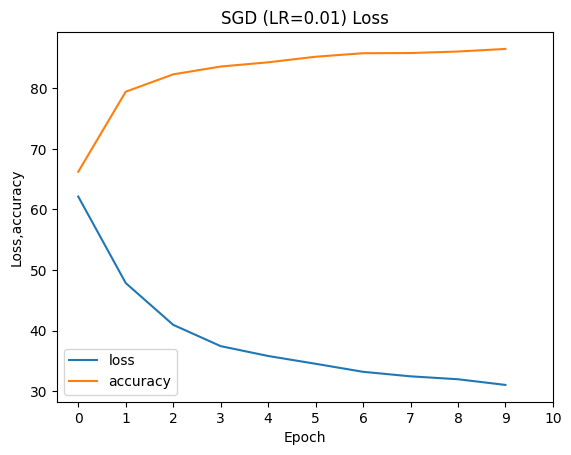

Training with SGD optimizer and learning rate 0.1
Epoch 1, Loss: 0.4599362543691842, Accuracy: 79.48%
Epoch 2, Loss: 0.3503721879122737, Accuracy: 85.06%
Epoch 3, Loss: 0.31357401328536266, Accuracy: 86.73%
Epoch 4, Loss: 0.27884610394795484, Accuracy: 88.32%
Epoch 5, Loss: 0.2519073736743805, Accuracy: 89.4%
Epoch 6, Loss: 0.22069904384331201, Accuracy: 90.89%
Epoch 7, Loss: 0.19284824499735437, Accuracy: 92.17%
Epoch 8, Loss: 0.16995567292236863, Accuracy: 92.93%
Epoch 9, Loss: 0.14471289622612274, Accuracy: 94.15%
Epoch 10, Loss: 0.12127841710925293, Accuracy: 95.35%


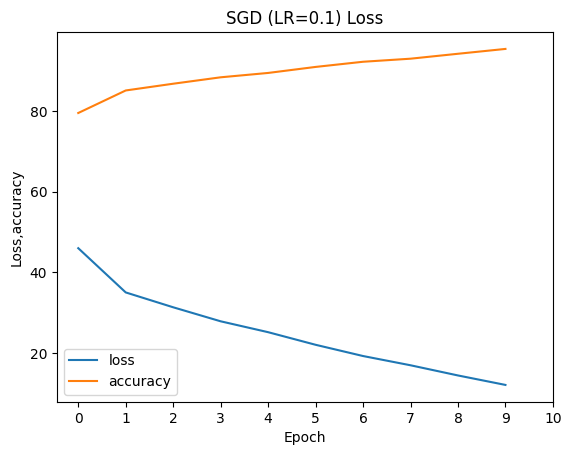

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Check if MPS (Metal Performance Shaders) is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Load and preprocess the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset for airplanes (label 0) and birds (label 2) and remap labels
def filter_classes(dataset, classes):
    filtered_data = []
    for data, label in dataset:
        if label in classes:
            new_label = 0 if label == 0 else 1  # Remap: 0 -> 0, 2 -> 1
            filtered_data.append((data, new_label))
    return filtered_data

filtered_trainset = filter_classes(trainset, [0, 2])
filtered_testset = filter_classes(testset, [0, 2])

# Update DataLoader
trainloader = torch.utils.data.DataLoader(filtered_trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(filtered_testset, batch_size=32, shuffle=False)

# 2. Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 2)  # Output 2 classes (airplane and bird)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Define the training function
def train_model(optimizer_name, learning_rate):
    model = SimpleCNN().to(device)  # Move model to GPU
    criterion = nn.CrossEntropyLoss()
    
    if optimizer_name == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    losses = []  # To store loss for each epoch
    accuracies = [] # To store accuracy for each epoch

    for epoch in range(10):  # Example: 10 epochs
        running_loss = 0.0
        correct = 0.0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            #calculate accuracy
            _, predicted = torch.max(outputs, 1) #get class with the highest score
            total += labels.size(0) # total number of samples
            correct += (predicted == labels).sum().item() # count correct predictions

        epoch_loss = running_loss / len(trainloader)
        epoch_accuracy = 100 * correct / total # accuracy as a percentage
        losses.append(epoch_loss*100)
        accuracies.append(epoch_accuracy)

        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')
    
    return losses, accuracies


# 4. Define the function to plot loss
def plot_loss(losses, title, accuracies):
    if title == "Adam (LR=0.1) Loss":
        #print("No losses to plot.")
        losses = [loss / 10 for loss in losses]
        #return
    
    plt.plot(losses)
    plt.plot(accuracies)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss ,accuracy as a percentage')
    plt.legend(['loss','accuracy'])
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
    plt.show()

# 5. Train the model with different optimizers and learning rates
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['Adam', 'SGD']

for optimizer in optimizers:
    for lr in learning_rates:
        print(f"Training with {optimizer} optimizer and learning rate {lr}")
        losses, accuracies = train_model(optimizer_name=optimizer, learning_rate=lr)
        plot_loss(losses=losses, title=f"{optimizer} (LR={lr}) Loss", accuracies=accuracies)

### Findings

Adam seems to converge way faster than SGD, specially as the learning rate is increased.

Also something weird happens when adam is given a high learning rate.